In [1]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [57]:
url = 'https://www.worldometers.info/coronavirus/'
response = requests.get(url)
data = response.text
soup = BeautifulSoup(data, 'html.parser')
tables = soup.find_all('table',{"id":"main_table_countries_today"})

In [3]:
import re
def process_num(num):
    return float(re.sub(r'[^\w\s.]','',num))

In [4]:
def process_int(num):
    return int(re.sub(r'[^\w\s.]','',num))

In [59]:
countries = []
total_cases = []
new_cases = []
total_deaths = []
new_deaths = []
total_recovereds = []
active_cases = []
serious_critical_cases = []
tot_cases_1m_pop = []
deaths_1m_pop = []
first_cases = []
for table in tables:
    rows = table.find_all('tr')
    
    for row in rows:
        cells = row.find_all('td')
        
        if len(cells) > 1:
            country = cells[0]
            countries.append(country.text.strip())
            
            
            total_case = cells[1]
            total_cases.append(process_int(total_case.text.strip()))
            
            new_case = cells[2]
            new_cases.append(new_case.text.strip().replace('+', ''))
            
            total_death = cells[3]
            total_deaths.append(total_death.text.strip())
            
                        
            new_death = cells[4]
            new_deaths.append(new_death.text.strip().replace('+', ''))

            total_recovered = cells[5]
            total_recovereds.append(total_recovered.text.strip())
            
            active_case = cells[6]
            active_cases.append(process_int(active_case.text.strip()))
            
            serious_critical_case = cells[7]
            serious_critical_cases.append(serious_critical_case.text.strip()) 
            
            tot_case_1m_pop = cells[8]
            tot_cases_1m_pop.append(tot_case_1m_pop.text.strip())            
            
            death_1m_pop = cells[9]
            deaths_1m_pop.append(death_1m_pop.text.strip())   
            
            first_case = cells[10]
            first_cases.append(first_case.text.strip())   
            

df1 = pd.DataFrame(countries, columns = ['Countries'])  
df1['total_cases'] = total_cases
df1['New Cases'] = new_cases
df1['Total Death'] = total_deaths
df1['New Death'] = new_deaths
df1['Total Recovered'] = total_recovereds
df1['Active Cases'] = active_cases
df1['Serious Critical Cases'] = serious_critical_cases
df1['Total Cases/1M POP'] = tot_cases_1m_pop
df1['Deaths/1M POP'] = deaths_1m_pop
df1['First Cases'] = first_cases

df1.drop(df1.tail(1).index,inplace=True)
df1.head(500)

,Countries,total_cases,New Cases,Total Death,New Death,Total Recovered,Active Cases,Serious Critical Cases,Total Cases/1M POP,Deaths/1M POP,First Cases
0,USA,116057,"11,931","1,937",241,"3,224",110896,"2,666",351,6,Jan 20
1,Italy,92472,"5,974","10,023",889,"12,384",70065,"3,856","1,529",166,Jan 29
2,Spain,72248,"6,529","5,812",674,"12,285",54151,"4,165","1,545",124,Jan 30
3,Germany,56202,"5,331",403,52,"6,658",49141,"1,581",671,5,Jan 26
4,Iran,35408,"3,076","2,517",139,"11,679",21212,"3,206",422,30,Feb 18
...,...,...,...,...,...,...,...,...,...,...,...
196,Turks and Caicos,2,,,,,2,,52,,Mar 22
197,Papua New Guinea,1,,,,,1,,0.1,,Mar 19
198,St. Vincent Grenadines,1,,,,,1,,9,,Mar 10
199,Timor-Leste,1,,,,,1,,0.8,,Mar 20


In [53]:
list(df1.columns.values)

['Countries',
 'total_cases',
 'New Cases',
 'Total Death',
 'New Death',
 'Total Recovered',
 'Active Cases',
 'Serious Critical Cases',
 'Total Cases/1M POP',
 'Deaths/1M POP',
 'First Cases']

In [54]:
list(df1.columns.types)

AttributeError: 'Index' object has no attribute 'types'

In [42]:
df1.dtypes

Countries                 object
total_cases                int64
New Cases                 object
Total Death               object
New Death                 object
Total Recovered           object
Active Cases               int64
Serious Critical Cases    object
Total Cases/1M POP        object
Deaths/1M POP             object
First Cases               object
dtype: object

In [63]:
df1.set_index(['Countries'], inplace = True) 
df2=df1.query('total_cases> 1000')
df2.head(20)

KeyError: "None of ['Countries'] are in the columns"

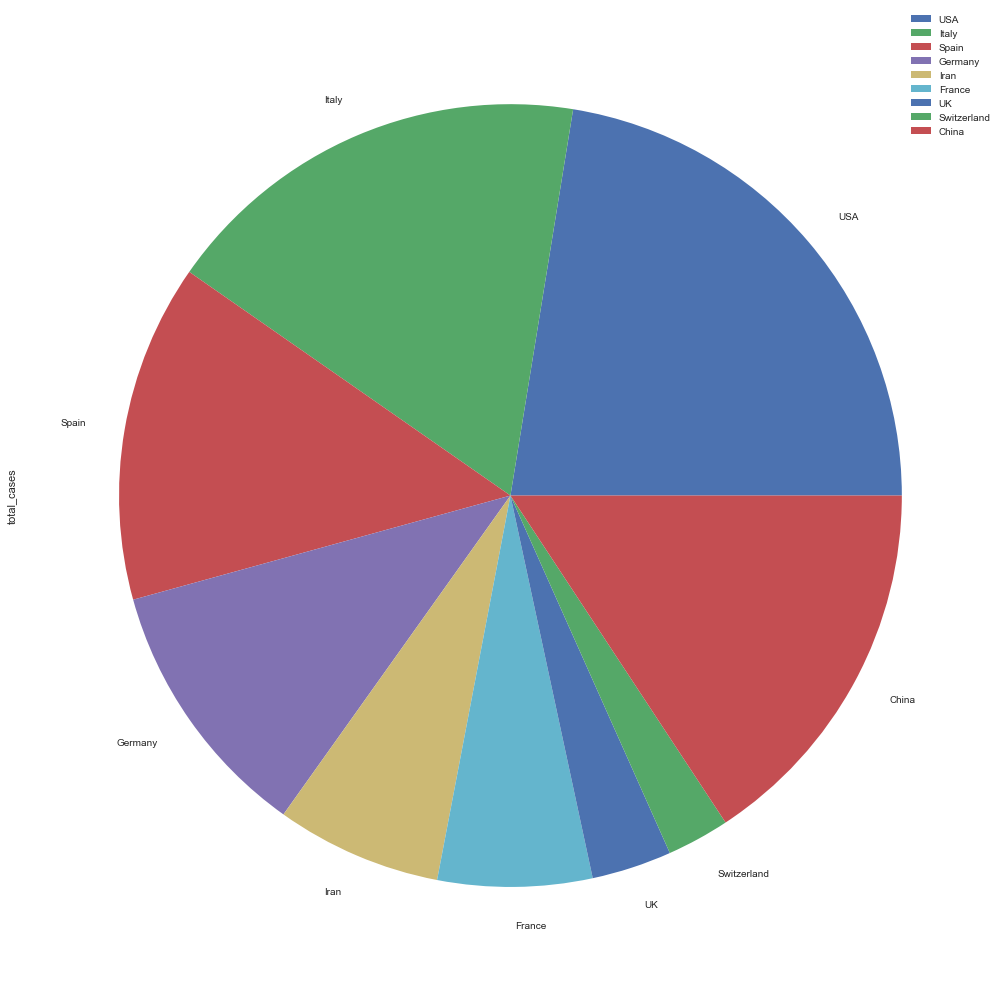

In [62]:
plot = df2.plot.pie(y='total_cases', figsize=(32, 18))

In [48]:
df3=df1.query('Countries== "USA"')
df3.head(20)

,Countries,total_cases,New Cases,Total Death,New Death,Total Recovered,Active Cases,Serious Critical Cases,Total Cases/1M POP,Deaths/1M POP,First Cases
0,USA,113677,"9,551","1,903",207,"3,219",108555,"2,666",343,6,Jan 20
203,USA,104126,"18,691","1,696",401,"2,522",99908,"2,463",315,5,Jan 20


In [69]:
df2=df1.query('total_cases> 5000')
df2.head(20)

,total_cases,New Cases,Total Death,New Death,Total Recovered,Active Cases,Serious Critical Cases,Total Cases/1M POP,Deaths/1M POP,First Cases
Countries,,,,,,,,,,
USA,116057,"11,931","1,937",241,"3,224",110896,"2,666",351,6,Jan 20
Italy,92472,"5,974","10,023",889,"12,384",70065,"3,856","1,529",166,Jan 29
Spain,72248,"6,529","5,812",674,"12,285",54151,"4,165","1,545",124,Jan 30
Germany,56202,"5,331",403,52,"6,658",49141,"1,581",671,5,Jan 26
Iran,35408,"3,076","2,517",139,"11,679",21212,"3,206",422,30,Feb 18
France,32964,,"1,995",,"5,700",25269,"3,787",505,31,Jan 23
UK,17089,"2,546","1,019",260,135,15935,163,252,15,Jan 30
Switzerland,13377,449,242,11,"1,530",11605,280,"1,546",28,Feb 24
Netherlands,9762,"1,159",639,93,3,9120,761,570,37,Feb 26


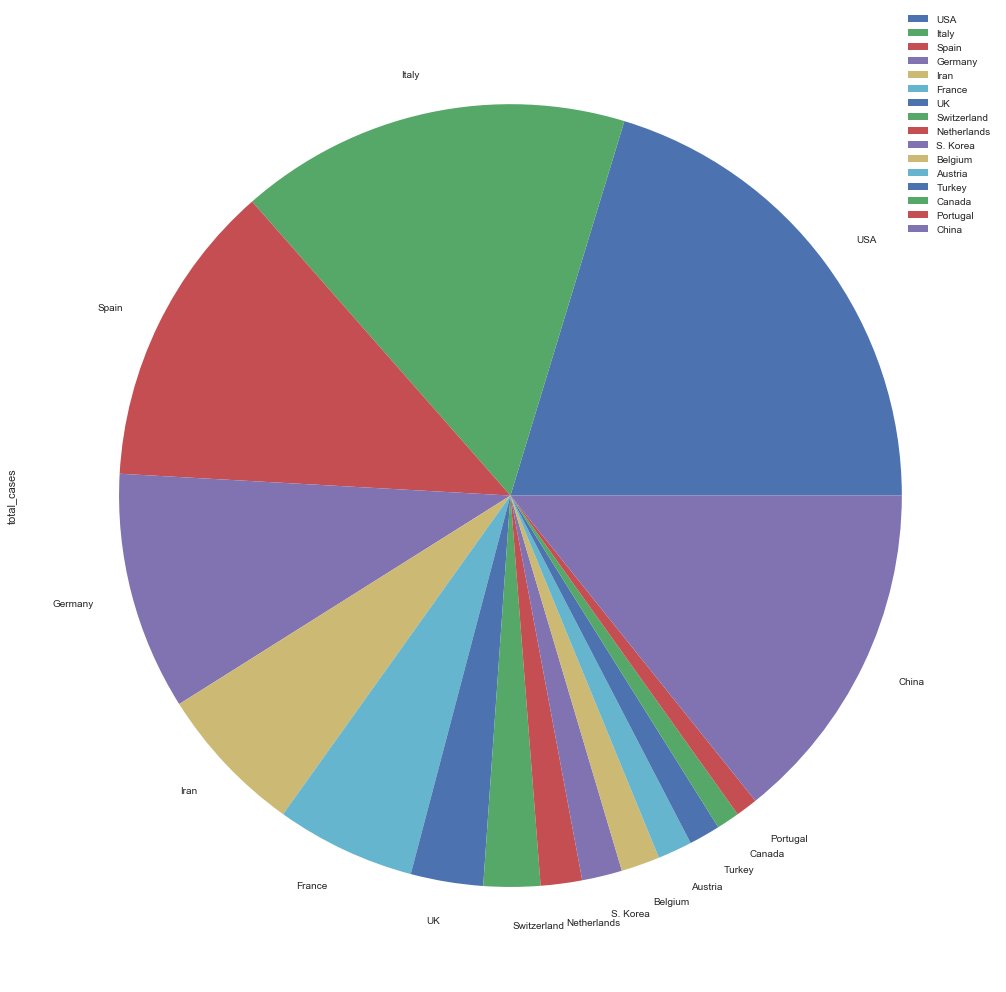

In [70]:
plot = df2.plot.pie(y='total_cases', figsize=(32, 18))

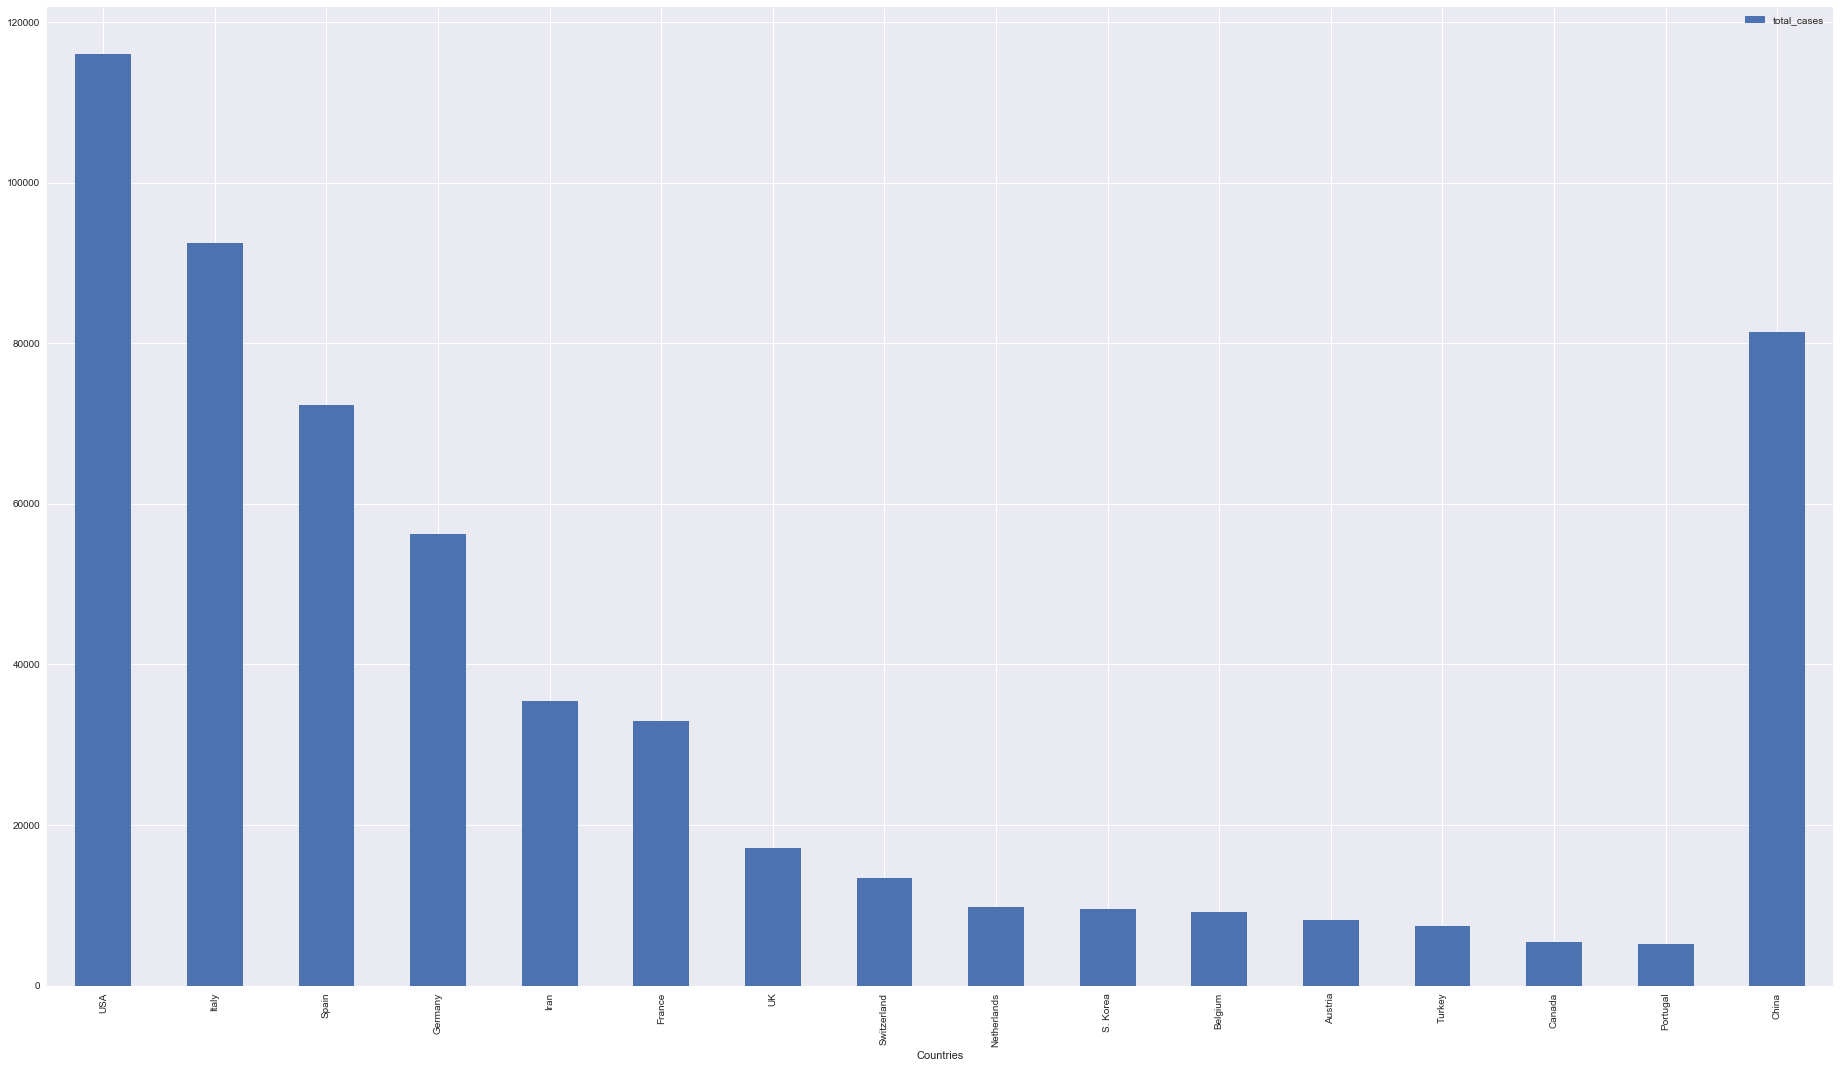

In [71]:
plot = df2.plot.bar(y='total_cases', figsize=(32, 18))